# Лабораторная работа №2
Глобальная оптимизация

In [289]:
import math
from typing import Tuple, Mapping

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
from numpy import random
import pygmo as pg

# Функция Бута
$f(x,y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

In [290]:
class Buta:
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        return [(x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2]

# Создаем проблему

In [291]:
udp = Buta(-10, 10, -10, 10)
prob = pg.problem(udp)
print(prob)

Problem name: <class '__main__.Buta'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



# Использование дифференциальной эволюции

In [292]:
number_of_generations = 1
current_seed = 424242
de_algo = pg.de(gen=number_of_generations, seed=current_seed)
algo = pg.algorithm(de_algo)
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 424242


# Создание полпуляции

In [293]:
pop_size = 1000
pop = pg.population(prob, size=pop_size, seed=current_seed)
print(pop)

Problem name: <class '__main__.Buta'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 1000

	Thread safety: none

Population size: 1000

List of individuals: 
#0:
	ID:			13257255600422094775
	Decision vector:	[-6.63386, -9.41695]
	Fitness vector:		[1820.6]
#1:
	ID:			8413053597835707361
	Decision vector:	[-0.0552431, 1.01842]
	Fitness vector:		[41.9294]
#2:
	ID:			11817002856114166717
	Decision vector:	[-0.526554, -5.7839]
	Fitness vector:		[504.709]
#3:
	ID:			2719735479635583825
	Decision vector:	[9.98587, -9.97417]
	Fitness vector:		[312.701]
#4:
	ID:			3990862726210149524
	Decision vect

# Запуск эволюции

In [294]:
number_of_evolutions = 100
individuals_list = []
fitness_list = []
for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])
print(f'''Champion data
Fitness value: {pop.champion_f}
Decision variable vector: {pop.champion_x}
Number of function evaluations: {pop.problem.get_fevals()}''')

Champion data
Fitness value: [1.35344467e-17]
Decision variable vector: [1. 3.]
Number of function evaluations: 101000


# Демонстрация чемпионов каждого поколения

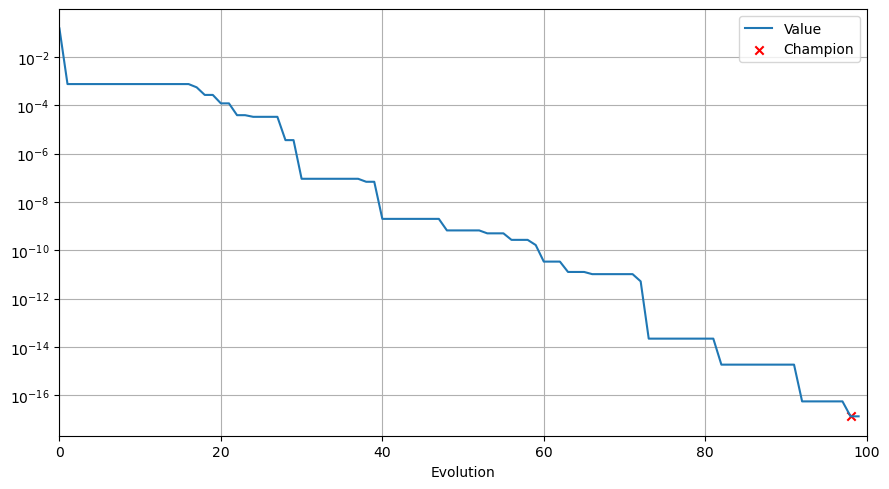

In [295]:
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]
(x_min, y_min), (x_max, y_max) = udp.get_bounds()
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Value')
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Champion')
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_xlabel('Evolution')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

# Чемпионы на графике функции

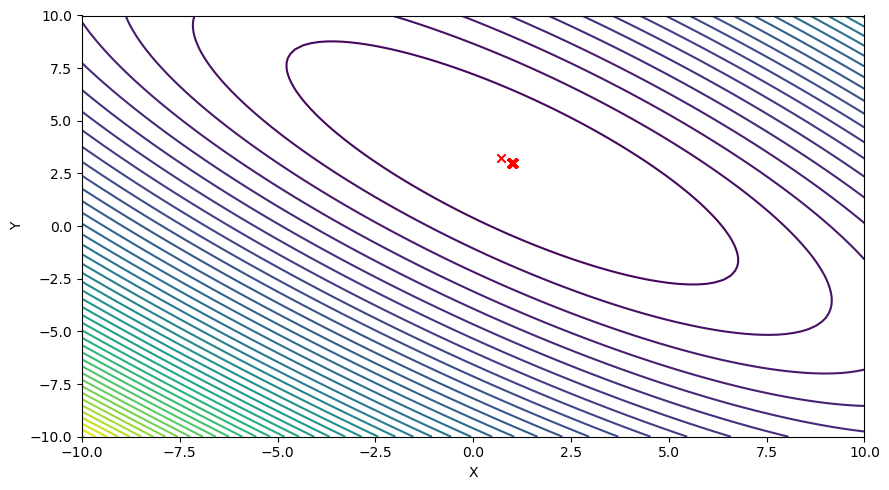

In [298]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)
ax.scatter(best_x, best_y, marker='x', color='r')
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

# Функция Химмельблау
$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$

In [299]:
class Him:
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        return [(x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2]

In [300]:
udp = Him(-5, 5, -5, 5)
prob = pg.problem(udp)
print(prob)

Problem name: <class '__main__.Him'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [301]:
number_of_generations = 1
current_seed = 424242
de_algo = pg.de(gen=number_of_generations, seed=current_seed)
algo = pg.algorithm(de_algo)
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 424242


In [302]:
pop_size = 1000
pop = pg.population(prob, size=pop_size, seed=current_seed)
print(pop)

Problem name: <class '__main__.Him'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 1000

	Thread safety: none

Population size: 1000

List of individuals: 
#0:
	ID:			13257255600422094775
	Decision vector:	[-3.31693, -4.70848]
	Fitness vector:		[162.64]
#1:
	ID:			8413053597835707361
	Decision vector:	[-0.0276216, 0.50921]
	Fitness vector:		[155.851]
#2:
	ID:			11817002856114166717
	Decision vector:	[-0.263277, -2.89195]
	Fitness vector:		[192.275]
#3:
	ID:			2719735479635583825
	Decision vector:	[4.99294, -4.98708]
	Fitness vector:		[602.725]
#4:
	ID:			3990862726210149524
	Decision vector:	

In [303]:
number_of_evolutions = 100
individuals_list = []
fitness_list = []
for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])
print(f'''Champion data
Fitness value: {pop.champion_f}
Decision variable vector: {pop.champion_x}
Number of function evaluations: {pop.problem.get_fevals()}''')

Champion data
Fitness value: [3.48945375e-10]
Decision variable vector: [3.00000054 1.99999521]
Number of function evaluations: 101000


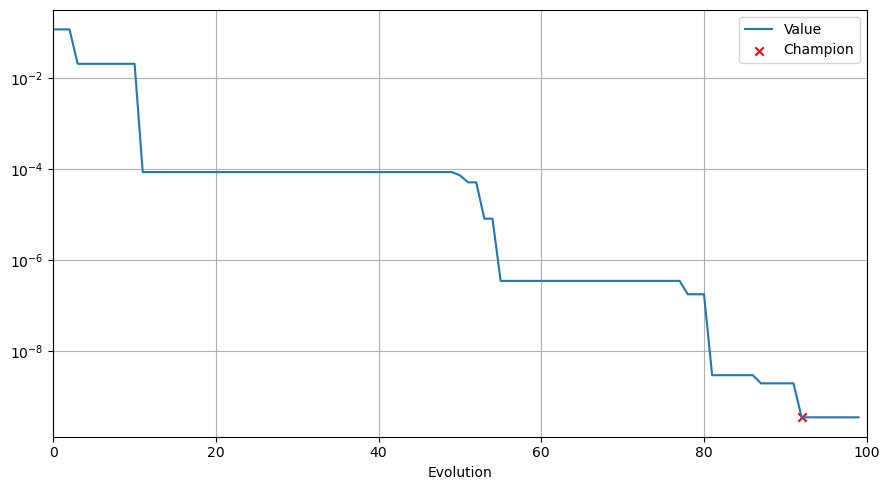

In [304]:
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]
(x_min, y_min), (x_max, y_max) = udp.get_bounds()
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Value')
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Champion')
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_xlabel('Evolution')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

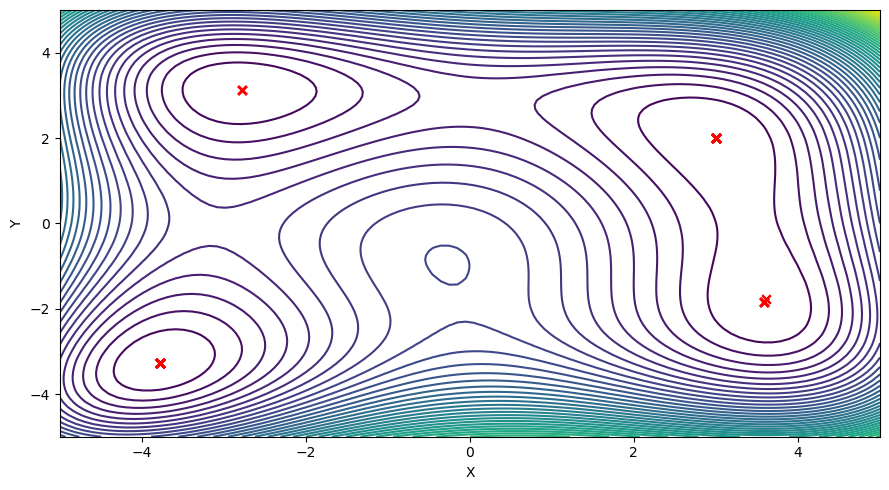

In [305]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)
ax.scatter(best_x, best_y, marker='x', color='r')
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

# Использование Pygmo для нахождения самого громкого сэмпла в аудио

[ 1.6517616e-08 -6.5464434e-08  1.2522355e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 22050


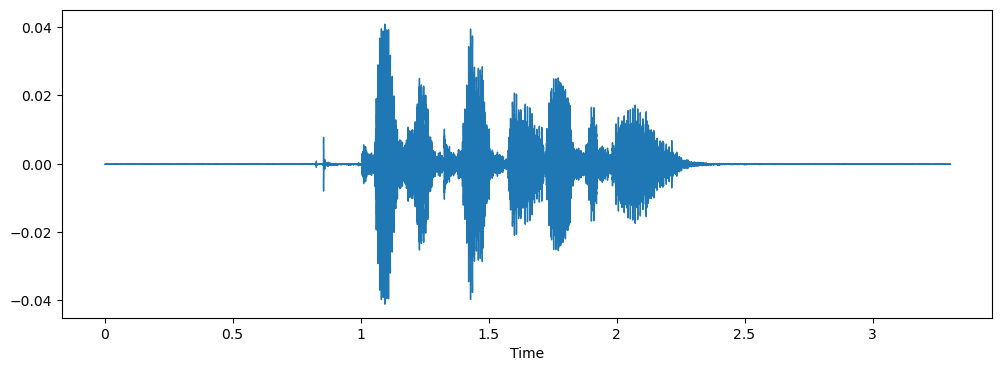

In [306]:
import librosa
from librosa import display
import os
import pandas as pd
import glob 


data, sampling_rate = librosa.load('03-01-01-01-01-01-01.wav')
print(data, sampling_rate)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)


In [307]:
class Audio:
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float,
                 audioData: np.ndarray):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.audioData = audioData

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        return [abs(1/self.audioData[int(x[0])])]

In [308]:
udp = Audio(0.0, len(data), 0.0, 0.0, data)
prob = pg.problem(udp)
print(prob)

Problem name: <class '__main__.Audio'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [72838, 0]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [309]:
number_of_generations = 1
current_seed = 424242
de_algo = pg.de(gen=number_of_generations, seed=current_seed)
algo = pg.algorithm(de_algo)
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 424242


In [310]:
pop_size = 1000
pop = pg.population(prob, size=pop_size, seed=current_seed)
print(pop)

Problem name: <class '__main__.Audio'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [72838, 0]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 1000

	Thread safety: none

Population size: 1000

List of individuals: 
#0:
	ID:			18171747826073854826
	Decision vector:	[12259.1, 0]
	Fitness vector:		[inf]
#1:
	ID:			9852528301238911744
	Decision vector:	[2123.4, 0]
	Fitness vector:		[3.70315e+11]
#2:
	ID:			10962458211400047985
	Decision vector:	[36217.8, 0]
	Fitness vector:		[497.24]
#3:
	ID:			17091489062625619894
	Decision vector:	[40128, 0]
	Fitness vector:		[477.025]
#4:
	ID:			10938666795221258957
	Decision vector:	[34501.3, 0]
	Fitness vector:	

C:\Temp\ipykernel_13320\3743950308.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return [abs(1/self.audioData[int(x[0])])]


In [311]:
number_of_evolutions = 100
individuals_list = []
fitness_list = []
for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])
print(f'''Champion data
Fitness value: {pop.champion_f}
Decision variable vector: {pop.champion_x}
Number of function evaluations: {pop.problem.get_fevals()}''')

C:\Temp\ipykernel_13320\3743950308.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return [abs(1/self.audioData[int(x[0])])]


Champion data
Fitness value: [24.4141586]
Decision variable vector: [24107.46452572     0.        ]
Number of function evaluations: 101000


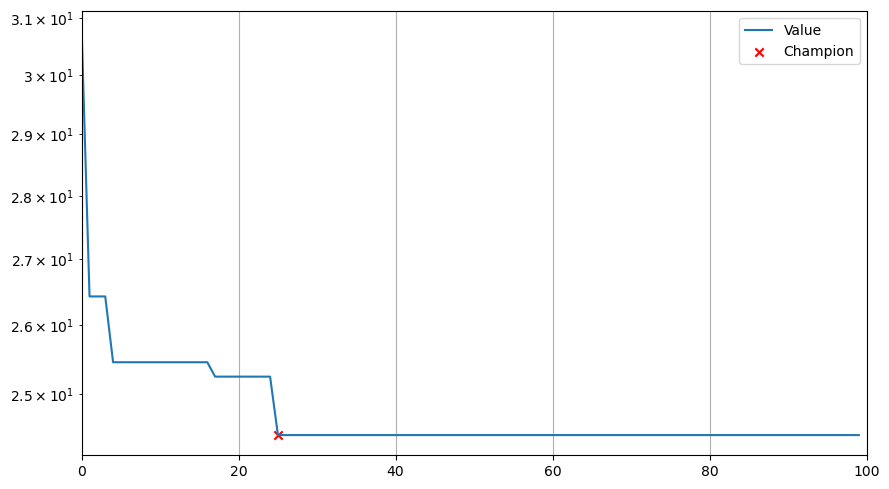

In [312]:
best_x = [ind[0]/sampling_rate for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

(x_min, y_min), (x_max, y_max) = udp.get_bounds()
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Value')
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Champion')
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

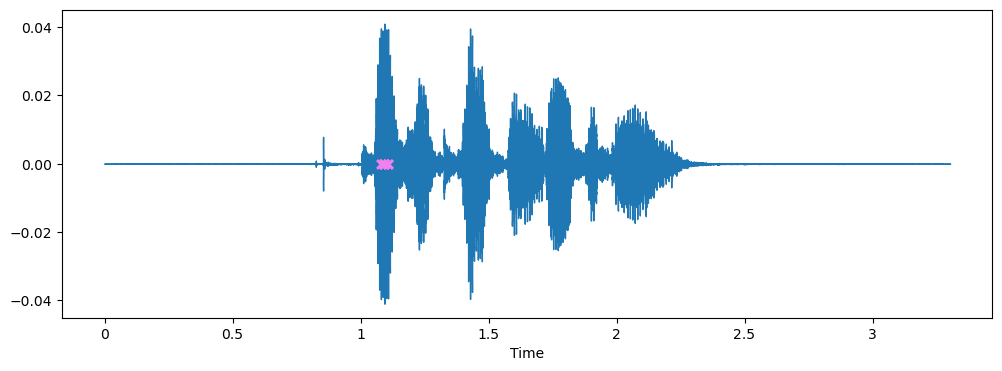

In [313]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.scatter(best_x, best_y, marker='x', color="violet")